In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
df = pd.read_csv('run_ww_2020_w_2020.csv', parse_dates=['datetime'])
df

,datetime,athlete,distance,duration,gender,age_group,country,major
0,2020-01-01,0,0.00,0.000000,F,18 - 34,United States,CHICAGO 2019
1,2020-01-01,1,70.33,394.200000,M,35 - 54,Germany,BERLIN 2016
2,2020-01-01,2,14.65,79.066667,M,35 - 54,United Kingdom,"LONDON 2018,LONDON 2019"
3,2020-01-01,3,41.41,195.666667,M,18 - 34,United Kingdom,LONDON 2017
4,2020-01-01,4,41.34,209.100000,M,35 - 54,United States,BOSTON 2017
...,...,...,...,...,...,...,...,...
58321,2020-01-08,22581,15.30,87.616667,M,35 - 54,United States,"BOSTON 2017,BOSTON 2019"
58322,2020-01-08,22582,15.80,88.100000,F,35 - 54,United States,"CHICAGO 2012,CHICAGO 2013"
58323,2020-01-08,22583,74.86,348.950000,M,18 - 34,Poland,NEW YORK 2019
58324,2020-01-08,22584,42.88,306.550000,M,55 +,United States,CHICAGO 2014


# 1.Data Profiling and Cleaning

In [5]:
# Overview
print("▶ Shape:", df.shape)
print("\n")
print("▶ Columns and dtypes:\n", df.dtypes)
print("\n")
print("▶ Preview:\n", df.head())

▶ Shape: (58326, 8)


▶ Columns and dtypes:
 datetime     datetime64[ns]
athlete               int64
distance            float64
duration            float64
gender               object
age_group            object
country              object
major                object
dtype: object


▶ Preview:
     datetime  athlete  distance    duration gender age_group         country  \
0 2020-01-01        0      0.00    0.000000      F   18 - 34   United States   
1 2020-01-01        1     70.33  394.200000      M   35 - 54         Germany   
2 2020-01-01        2     14.65   79.066667      M   35 - 54  United Kingdom   
3 2020-01-01        3     41.41  195.666667      M   18 - 34  United Kingdom   
4 2020-01-01        4     41.34  209.100000      M   35 - 54   United States   

                     major  
0             CHICAGO 2019  
1              BERLIN 2016  
2  LONDON 2018,LONDON 2019  
3              LONDON 2017  
4              BOSTON 2017  


In [6]:
#Dataset statistics
print("\n▶ Numeric summary:\n", df.describe().T)
print("\n▶ Categorical summary:\n", df.select_dtypes('object').describe().T)


▶ Numeric summary:
             count                           mean                  min  \
datetime    58326  2020-01-03 15:07:12.918424064  2020-01-01 00:00:00   
athlete   58326.0                   15981.046823                  0.0   
distance  58326.0                      28.823141                  0.0   
duration  58326.0                     157.275255                  0.0   

                          25%                  50%                  75%  \
datetime  2020-01-01 00:00:00  2020-01-01 00:00:00  2020-01-08 00:00:00   
athlete               7560.25              15068.0             22542.75   
distance                 1.78                 20.8                45.14   
duration            12.070833           118.716667           248.995833   

                          max           std  
datetime  2020-01-08 00:00:00           NaN  
athlete               37598.0  10100.546796  
distance               444.84     30.152199  
duration          3046.983333    160.841097  

▶ Cate

In [7]:
# Missing values
missing = df.isna().sum().sort_values(ascending=False)
print("\n▶ Missing values per column:\n", missing[missing > 0])


▶ Missing values per column:
 country    511
major        1
dtype: int64


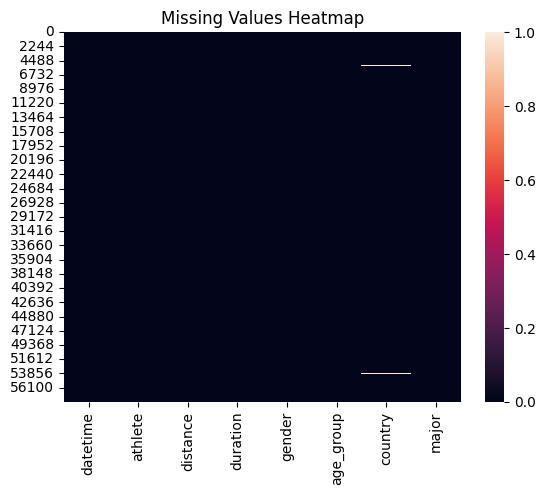

In [8]:
# Visualize missing values
sns.heatmap(df.isnull(), cbar=True)
plt.title("Missing Values Heatmap")
plt.show()

In [9]:
# Data type corrections
# Example: ensure 'distance' & 'duration' are floats
df['distance'] = pd.to_numeric(df['distance'], errors='coerce')
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

In [10]:
#Handle missing data
# Option A: Drop rows with critical nulls
df = df.dropna(subset=['distance', 'duration', 'datetime'])

In [11]:
df

,datetime,athlete,distance,duration,gender,age_group,country,major
0,2020-01-01,0,0.00,0.000000,F,18 - 34,United States,CHICAGO 2019
1,2020-01-01,1,70.33,394.200000,M,35 - 54,Germany,BERLIN 2016
2,2020-01-01,2,14.65,79.066667,M,35 - 54,United Kingdom,"LONDON 2018,LONDON 2019"
3,2020-01-01,3,41.41,195.666667,M,18 - 34,United Kingdom,LONDON 2017
4,2020-01-01,4,41.34,209.100000,M,35 - 54,United States,BOSTON 2017
...,...,...,...,...,...,...,...,...
58321,2020-01-08,22581,15.30,87.616667,M,35 - 54,United States,"BOSTON 2017,BOSTON 2019"
58322,2020-01-08,22582,15.80,88.100000,F,35 - 54,United States,"CHICAGO 2012,CHICAGO 2013"
58323,2020-01-08,22583,74.86,348.950000,M,18 - 34,Poland,NEW YORK 2019
58324,2020-01-08,22584,42.88,306.550000,M,55 +,United States,CHICAGO 2014


In [12]:
# Handling Duplicates
dupes = df.duplicated()
print("▶ Duplicate rows:", dupes.sum())

▶ Duplicate rows: 0


In [13]:
# Outlier detection (using IQR for 'pace' = duration/distance)
df['pace'] = df['duration'] / df['distance']

Q1 = df['pace'].quantile(0.25)
Q3 = df['pace'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

print(f"\n▶ Pace IQR outlier bounds: [{lower:.2f}, {upper:.2f}]")
outliers = df[(df['pace'] < lower) | (df['pace'] > upper)]
print("▶ Number of outlier runs:", len(outliers))


▶ Pace IQR outlier bounds: [3.24, 7.82]
▶ Number of outlier runs: 2056


In [14]:
df

,datetime,athlete,distance,duration,gender,age_group,country,major,pace
0,2020-01-01,0,0.00,0.000000,F,18 - 34,United States,CHICAGO 2019,NaN
1,2020-01-01,1,70.33,394.200000,M,35 - 54,Germany,BERLIN 2016,5.605005
2,2020-01-01,2,14.65,79.066667,M,35 - 54,United Kingdom,"LONDON 2018,LONDON 2019",5.397042
3,2020-01-01,3,41.41,195.666667,M,18 - 34,United Kingdom,LONDON 2017,4.725107
4,2020-01-01,4,41.34,209.100000,M,35 - 54,United States,BOSTON 2017,5.058055
...,...,...,...,...,...,...,...,...,...
58321,2020-01-08,22581,15.30,87.616667,M,35 - 54,United States,"BOSTON 2017,BOSTON 2019",5.726580
58322,2020-01-08,22582,15.80,88.100000,F,35 - 54,United States,"CHICAGO 2012,CHICAGO 2013",5.575949
58323,2020-01-08,22583,74.86,348.950000,M,18 - 34,Poland,NEW YORK 2019,4.661368
58324,2020-01-08,22584,42.88,306.550000,M,55 +,United States,CHICAGO 2014,7.149021


In [15]:
# Consistency checks on categorical fields
for col in ['gender', 'age_group', 'country']:
    if col in df.columns:
        print(f"\n▶ Unique values in '{col}':", df[col].unique())

# Final cleaned shape
print("\n▶ Cleaned data shape:", df.shape)


▶ Unique values in 'gender': ['F' 'M']

▶ Unique values in 'age_group': ['18 - 34' '35 - 54' '55 +']

▶ Unique values in 'country': ['United States' 'Germany' 'United Kingdom' 'Australia' 'Spain' 'Canada'
 'Colombia' 'Japan' 'Malaysia' 'Belarus' 'Switzerland' 'Italy' 'Norway'
 'Netherlands' 'France' 'Mexico' 'Brazil' 'Taiwan' 'Peru' 'Russia'
 'Luxembourg' 'Sweden' 'Singapore' nan 'Slovenia' 'Costa Rica' 'Indonesia'
 'Denmark' 'Austria' 'Poland' 'Chile' 'South Africa' 'Belgium' 'China'
 'Isle of Man' 'Cayman Islands' 'Iceland' 'Portugal' 'Romania' 'Thailand'
 'Estonia' 'Finland' 'Moldova' 'South Korea' 'Argentina' 'Czechia'
 'Ukraine' 'Slovakia' 'Dominican Republic' 'Israel' 'Guatemala' 'Jersey'
 'Ireland' 'Turkey' 'United Arab Emirates' 'Uruguay' 'New Zealand'
 'Hungary' 'Philippines' 'Myanmar' 'Greece' 'India' 'Croatia' 'Panama'
 'Cyprus' 'Vietnam' 'Guernsey' 'Mongolia' 'Lithuania' 'Bolivia' 'Andorra'
 'El Salvador' 'Latvia' 'Nicaragua' 'Jordan' 'Ecuador' 'Kazakhstan'
 'Kosovo' 'Bulg

# 2. Feature Engineering

In [16]:
#  Extract datetime components
df['date']       = df['datetime'].dt.date
df['year']       = df['datetime'].dt.year
df['month']      = df['datetime'].dt.month
df['day']        = df['datetime'].dt.day
df['day_of_week']= df['datetime'].dt.dayofweek
df['weekofyear'] = df['datetime'].dt.isocalendar().week

In [17]:
df

,datetime,athlete,distance,duration,gender,age_group,country,major,pace,date,year,month,day,day_of_week,weekofyear
0,2020-01-01,0,0.00,0.000000,F,18 - 34,United States,CHICAGO 2019,NaN,2020-01-01,2020,1,1,2,1
1,2020-01-01,1,70.33,394.200000,M,35 - 54,Germany,BERLIN 2016,5.605005,2020-01-01,2020,1,1,2,1
2,2020-01-01,2,14.65,79.066667,M,35 - 54,United Kingdom,"LONDON 2018,LONDON 2019",5.397042,2020-01-01,2020,1,1,2,1
3,2020-01-01,3,41.41,195.666667,M,18 - 34,United Kingdom,LONDON 2017,4.725107,2020-01-01,2020,1,1,2,1
4,2020-01-01,4,41.34,209.100000,M,35 - 54,United States,BOSTON 2017,5.058055,2020-01-01,2020,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58321,2020-01-08,22581,15.30,87.616667,M,35 - 54,United States,"BOSTON 2017,BOSTON 2019",5.726580,2020-01-08,2020,1,8,2,2
58322,2020-01-08,22582,15.80,88.100000,F,35 - 54,United States,"CHICAGO 2012,CHICAGO 2013",5.575949,2020-01-08,2020,1,8,2,2
58323,2020-01-08,22583,74.86,348.950000,M,18 - 34,Poland,NEW YORK 2019,4.661368,2020-01-08,2020,1,8,2,2
58324,2020-01-08,22584,42.88,306.550000,M,55 +,United States,CHICAGO 2014,7.149021,2020-01-08,2020,1,8,2,2


In [18]:
#Training load features (rolling aggregates)
# Sort by runner and date first
df = df.sort_values(['athlete','datetime'])

In [19]:
# 7-day rolling average pace and total distance
df['7d_avg_pace']     = df.groupby('athlete')['pace']\
                            .rolling(window=7, min_periods=1).mean().reset_index(0,drop=True)
df['7d_total_distance']= df.groupby('athlete')['distance']\
                            .rolling(window=7, min_periods=1).sum().reset_index(0,drop=True)

# 30-day rolling count of runs (training frequency)
df['30d_run_count']   = df.groupby('athlete')['distance']\
                            .rolling(window=30, min_periods=1).count().reset_index(0,drop=True)

In [20]:
# Cumulative season metrics
# Track cumulative distance this year per runner
df['annual_cum_dist'] = df.groupby(['athlete','year'])['distance']\
                             .cumsum()

# Lag features (prior run metrics)
# Pace of previous run
df['prev_pace'] = df.groupby('athlete')['pace'].shift(1)
# Days since last run
df['days_since_last'] = df.groupby('athlete')['datetime'].diff().dt.days

In [21]:
# Interaction features (example)
# Pace × cumulative distance (to capture endurance effect)
df['pace_x_cumdist'] = df['pace'] * df['annual_cum_dist']

#Categorical encoding examples
# One-hot encode day_of_week
dow_dummies = pd.get_dummies(df['day_of_week'], prefix='dow', drop_first=True)
df = pd.concat([df, dow_dummies], axis=1)

# Label encode gender
if 'gender' in df.columns:
    df['gender_code'] = df['gender'].map({'M':0, 'F':1, 'Other':2})

In [22]:
# Handle missing in engineered features
# For lag and rolling windows, fill NaNs with reasonable defaults
df['prev_pace']        = df['prev_pace'].fillna(df['pace'])
df['days_since_last']  = df['days_since_last'].fillna(df['days_since_last'].median())

# Final check
print("\n▶ Feature-engineered DataFrame head:\n", df.head())
print("\n▶ Final columns:\n", df.columns.tolist())


▶ Feature-engineered DataFrame head:
         datetime  athlete  distance    duration gender age_group  \
0     2020-01-01        0      0.00    0.000000      F   18 - 34   
36412 2020-01-08        0      0.00    0.000000      F   18 - 34   
1     2020-01-01        1     70.33  394.200000      M   35 - 54   
36413 2020-01-08        1     68.73  402.000000      M   35 - 54   
2     2020-01-01        2     14.65   79.066667      M   35 - 54   

              country                    major      pace        date  ...  \
0       United States             CHICAGO 2019       NaN  2020-01-01  ...   
36412   United States             CHICAGO 2019       NaN  2020-01-08  ...   
1             Germany              BERLIN 2016  5.605005  2020-01-01  ...   
36413         Germany              BERLIN 2016  5.848974  2020-01-08  ...   
2      United Kingdom  LONDON 2018,LONDON 2019  5.397042  2020-01-01  ...   

       day_of_week  weekofyear  7d_avg_pace  7d_total_distance  30d_run_count  \
0       

# 3. Exploratory Data Analysis

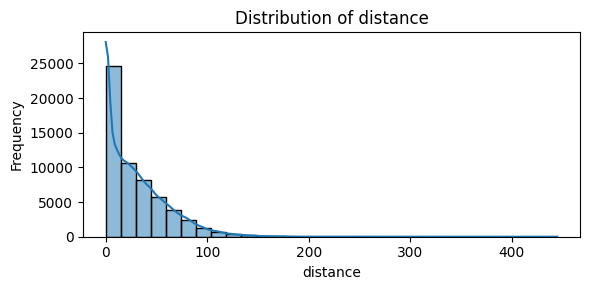

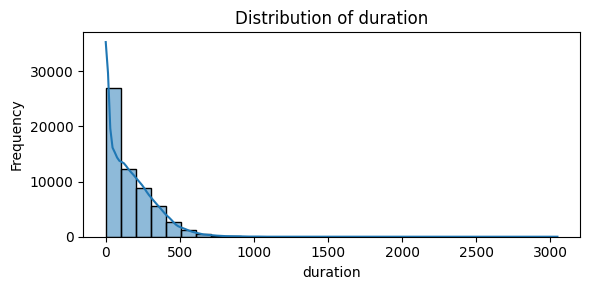

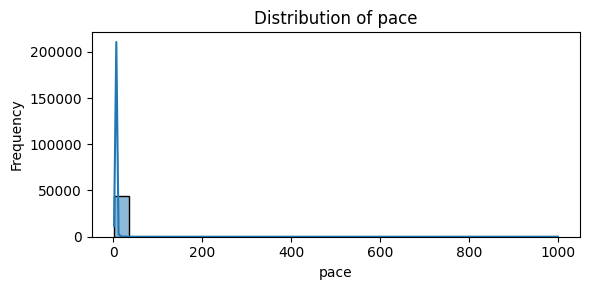

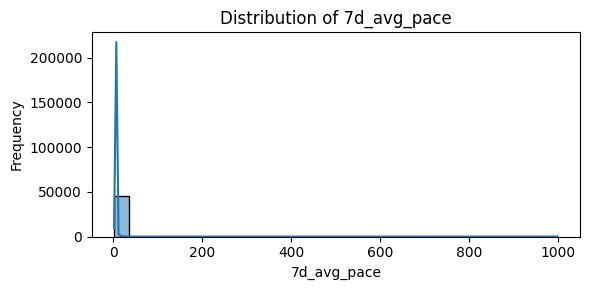

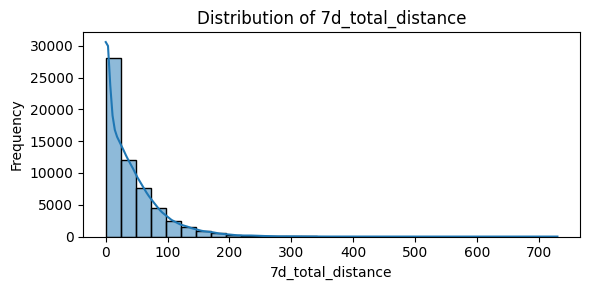

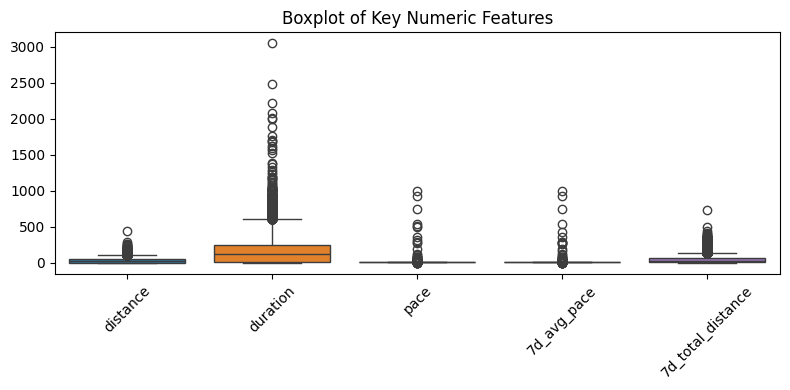

In [23]:
%matplotlib inline

### Univariate Analysis

# Numeric distributions
numeric_cols = ['distance', 'duration', 'pace', '7d_avg_pace', '7d_total_distance']
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Key Numeric Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

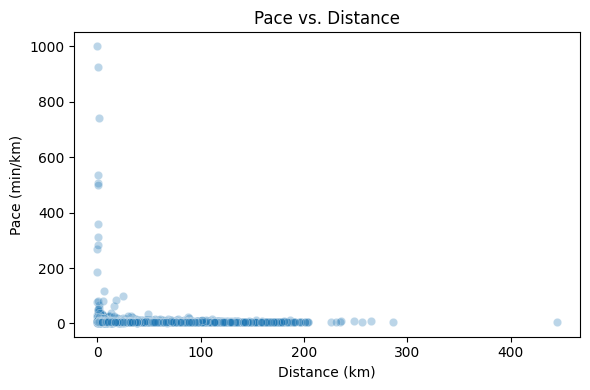

In [24]:
### Bivariate Analysis

# Scatter: distance vs. pace
plt.figure(figsize=(6, 4))
sns.scatterplot(x='distance', y='pace', data=df, alpha=0.3)
plt.title('Pace vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Pace (min/km)')
plt.tight_layout()
plt.show()

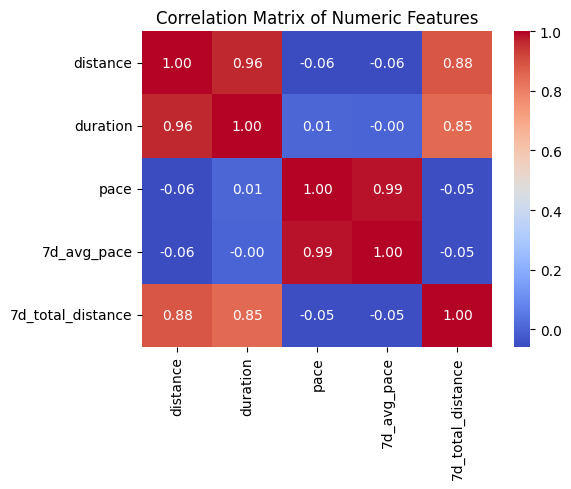

In [25]:
# Correlation matrix heatmap
corr = df[numeric_cols].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

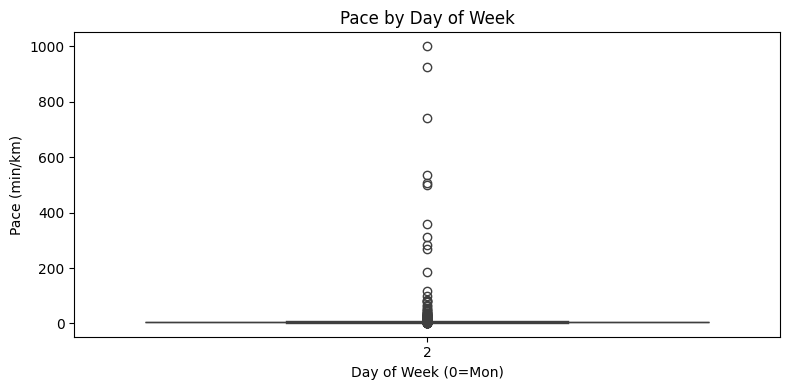

<ipython-input-26-d7942c71e6c4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='distance', data=monthly, palette='Blues_d')


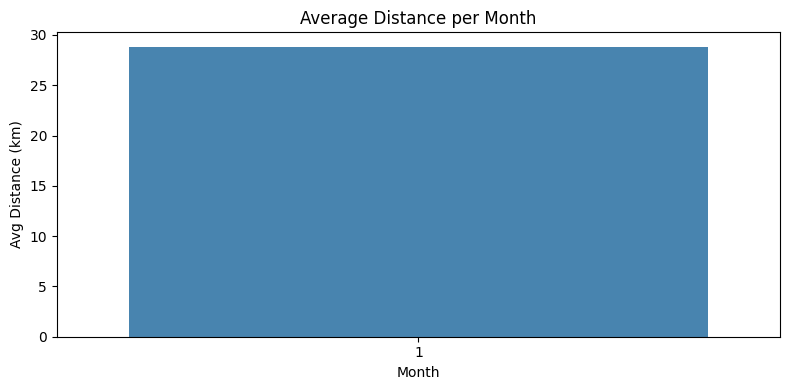

In [26]:
###  Categorical Comparisons

# Pace by day of week
plt.figure(figsize=(8, 4))
sns.boxplot(x='day_of_week', y='pace', data=df)
plt.title('Pace by Day of Week')
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Pace (min/km)')
plt.tight_layout()
plt.show()

# Average distance by month
monthly = df.groupby('month')['distance'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(x='month', y='distance', data=monthly, palette='Blues_d')
plt.title('Average Distance per Month')
plt.xlabel('Month')
plt.ylabel('Avg Distance (km)')
plt.tight_layout()
plt.show()

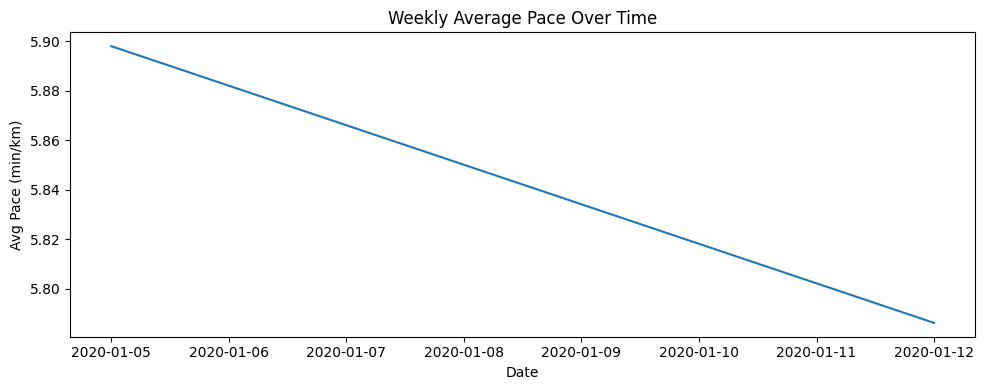

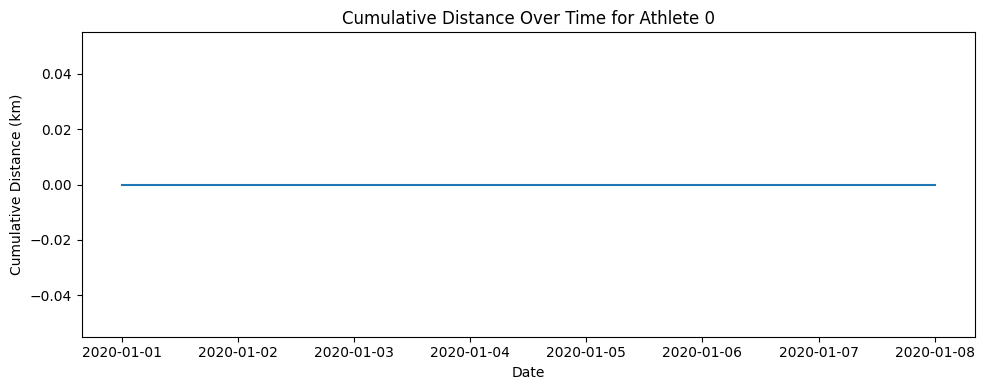

In [27]:
### Time-Series Analysis

# Time series of weekly average pace
weekly = df.resample('W', on='datetime')['pace'].mean().reset_index()
plt.figure(figsize=(10, 4))
sns.lineplot(x='datetime', y='pace', data=weekly)
plt.title('Weekly Average Pace Over Time')
plt.xlabel('Date')
plt.ylabel('Avg Pace (min/km)')
plt.tight_layout()
plt.show()

# Cumulative distance over time for a sample athlete
sample_id = df['athlete'].iloc[0]
athlete_df = df[df['athlete'] == sample_id].sort_values('datetime')
athlete_df['cum_dist'] = athlete_df['distance'].cumsum()

plt.figure(figsize=(10, 4))
sns.lineplot(x='datetime', y='cum_dist', data=athlete_df)
plt.title(f'Cumulative Distance Over Time for Athlete {sample_id}')
plt.xlabel('Date')
plt.ylabel('Cumulative Distance (km)')
plt.tight_layout()
plt.show()

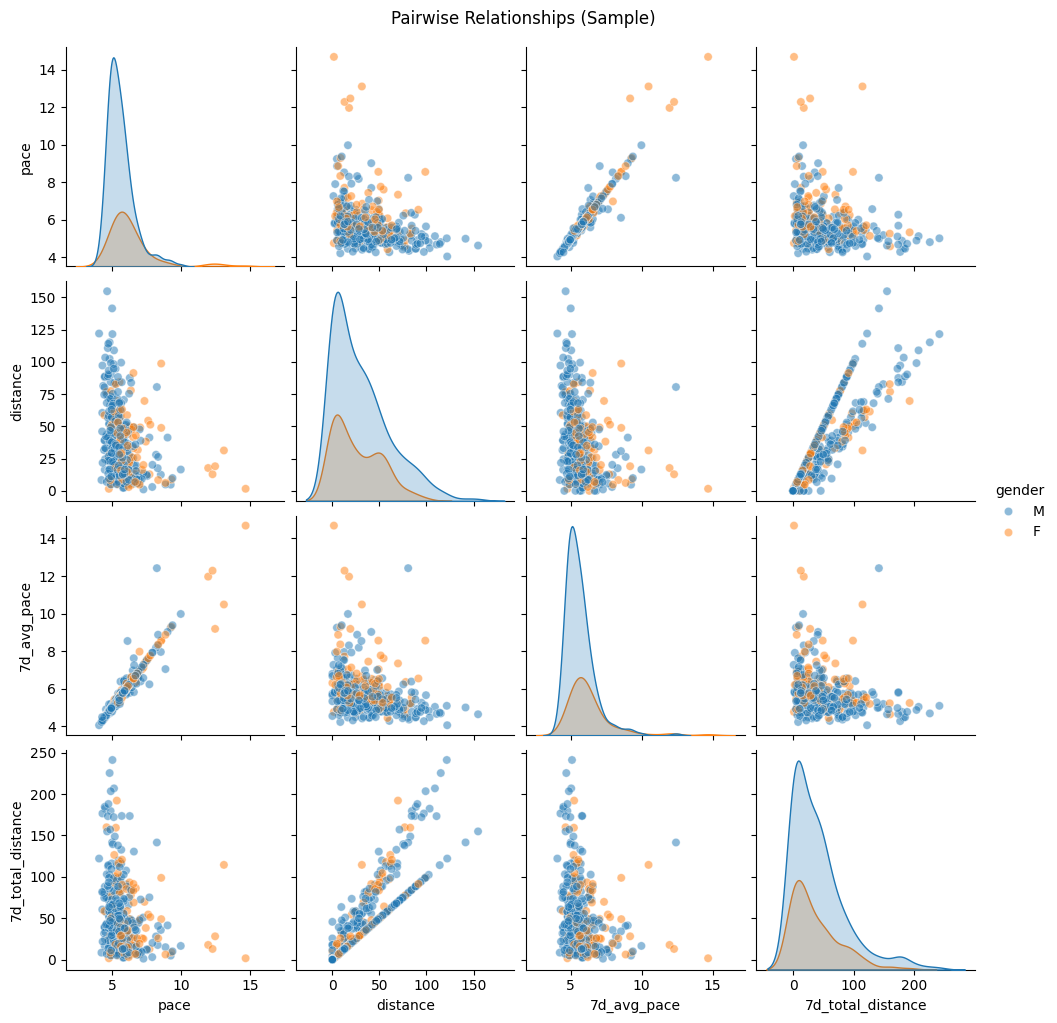

In [28]:
### Pairplot for Feature Interactions (subset)

subset = df.sample(n=500, random_state=42)  # limit size for performance
sns.pairplot(subset, vars=['pace', 'distance', '7d_avg_pace', '7d_total_distance'],
             hue='gender', plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Relationships (Sample)', y=1.02)
plt.show()

# 4. Model Preparation

In [29]:
# Drop any rows where the target is NaN because that is the target variable
df = df.dropna(subset=['pace'])

# Define target and features
TARGET = 'pace'
# Drop non-feature columns
drop_cols = ['datetime', 'date', TARGET, 'athlete']
X = df.drop(columns=drop_cols)
y = df[TARGET]

# Identify column types
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

#Reduce high‐cardinality categories
# Keep only the top 20 most frequent categories per column, others as “Other”
def reduce_cardinality(series, top_n=20):
    top = series.value_counts().nlargest(top_n).index
    return series.where(series.isin(top), other='Other')

for col in categorical_cols:
    X[col] = reduce_cardinality(X[col], top_n=20)

print(f"Numeric columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")

Numeric columns: ['distance', 'duration', '7d_avg_pace', '7d_total_distance', '30d_run_count', 'annual_cum_dist', 'prev_pace', 'days_since_last', 'pace_x_cumdist', 'gender_code']
Categorical columns: ['gender', 'age_group', 'country', 'major']


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 35144, Testing samples: 8786


In [31]:
# Preprocessing pipelines
# Numeric pipeline: impute missing, then scale
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

# Categorical pipeline: impute missing, then one-hot encode
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
])

# Combine into a single ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols),
])


In [32]:
#Full pipeline with placeholder for model
from sklearn.linear_model import Ridge

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0)),
])

# Fit pipeline on training data
model_pipeline.fit(X_train, y_train)

# Transform a sample and predict to verify
sample_X = X_test.iloc[:5]
preds = model_pipeline.predict(sample_X)

print("Sample predictions:", preds)

Sample predictions: [10.24735603  5.67336781  4.33944497  6.26408717  4.57242308]


# 5. Model Training with Cross-Validation

In [33]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score


# Define models to compare
models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
}

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Scoring functions
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)  # negative MAE for cross_val_score
r2_scorer = make_scorer(r2_score)

# Container for results
results = []

for name, estimator in models.items():
    # Build a full pipeline with this estimator
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', estimator)
    ])

    # Evaluate with cross-validation
    neg_mae = cross_val_score(pipeline, X_train, y_train,
                              cv=kf, scoring=mae_scorer, n_jobs=-1)
    r2 = cross_val_score(pipeline, X_train, y_train,
                         cv=kf, scoring=r2_scorer, n_jobs=-1)

    results.append({
        'model': name,
        'MAE_mean': -np.mean(neg_mae),
        'MAE_std': np.std(neg_mae),
        'R2_mean': np.mean(r2),
        'R2_std': np.std(r2)
    })

# Display results
results_df = pd.DataFrame(results).sort_values('MAE_mean')
print("\nCross-Validation Results:")
print(results_df.to_string(index=False))


Cross-Validation Results:
       model  MAE_mean  MAE_std  R2_mean   R2_std
       Ridge  0.003599 0.001076 0.999984 0.000025
RandomForest  0.078757 0.025609 0.911011 0.042522
       Lasso  0.101867 0.019591 0.981169 0.024214


# 6. Evaluation and Hyperparameter Tuning


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


#  Define model and hyperparameter grid
model = RandomForestRegressor(random_state=42)

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', model)
])

#  Grid search with 3‑fold CV
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best CV MAE:", -grid_search.best_score_)



Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters: {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Best CV MAE: 0.055740971471160285


In [35]:
# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2  = r2_score(y_test, y_pred)

print(f"\nTest MAE:  {mae:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R²:   {r2:.3f}")




Test MAE:  0.095
Test RMSE: 4.501
Test R²:   0.416


In [36]:
# Feature importance (for tree‑based models)
importances = best_model.named_steps['regressor'].feature_importances_
feature_names = (
    numeric_cols
    + list(best_model.named_steps['preprocessor']
           .named_transformers_['cat']
           .named_steps['onehot']
           .get_feature_names_out(categorical_cols))
)

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("\nTop 10 feature importances:")
print(feat_imp.head(10))


Top 10 feature importances:
7d_avg_pace          0.911035
prev_pace            0.058897
distance             0.005886
7d_total_distance    0.003969
annual_cum_dist      0.003436
major_Other          0.003382
gender_F             0.002627
age_group_18 - 34    0.002371
pace_x_cumdist       0.002362
country_Norway       0.001950
dtype: float64
